In [17]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact
import pandas as pd
from numpy import cos,sin,pi,dot,arccos 
from numpy.linalg import norm # this is the magnitude function
from mpl_toolkits.mplot3d import axes3d
from itertools import combinations

plt.rcParams["figure.figsize"] = [8, 8]

In [4]:
%%HTML
<style>
td {
  font-size: 20px;
}
</style>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# Warm up 

Please answer the following (not serious) survey.

## [https://tinyurl.com/rlma4z8](https://tinyurl.com/rlma4z8)

In [5]:
IFrame("https://docs.google.com/forms/d/e/1FAIpQLSeJFwqIt4yt5PtuyM5P7DOTuCOFfFNu2MNbZRHH-i-t5dUfaw/viewform?embedded=true",width=640,height=1549)

## Announcements

  - Quiz 1 on Gradescope this week
    - Distance formula
    - Vector operations
    - Dot product and its properties
    - projection
  - Homework 2 posted, due 09/22, 8am EDT
  
    

## Vector Operations

Let $\vec v, \vec w$ be vectors in $\RR^n$ and $c$ a scalar. 

| Operation | Notation | Formula | Output |
|---|---| --- |---|
| magnitude    | $|\vec v|$ | $$\sqrt{\sum v_i^2}$$ | scalar |
| scalar multiplication | $c \vec v$ | $$\langle c v_1, \ldots ,c v_n \rangle $$| vector |
| vector addition | $\vec v + \vec w$ | $$\langle v_1 + w_1,\ldots, v_n + w_n \rangle $$| vector |
| dot product | $\vec v \cdot \vec w$ | $$v_1 w_1 + \cdots + v_n w_n  $$| scalar |

# Application: Dot Products and Match-making

We collect the above survey data and store each individuals ratings as a vector in $\RR^5$. We subtract 5 from each entry so the "neutral" vector $\langle 5,5,5,5,5 \rangle$ is translated to the origin. 

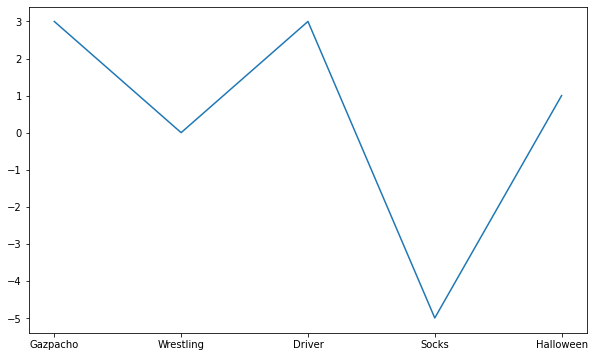

In [16]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQo8Y7wh33vZv9uYdewzwASSfYXQsPEGWldt_lWk8MPBYnBxKprcysZ-u9hjqPIWIeqndB4f-U1oAoM/pub?gid=1201323166&single=true&output=csv"
responses = pd.read_csv(url)
qs = ['Gazpacho', 'Wrestling',
       'Driver', 'Socks',
       'Halloween']
responses.columns = ['Timestamp', 'Name'] + qs
answers = responses[qs].to_numpy() - 5
plt.figure(figsize=((10,6)))
plt.plot(np.transpose(answers));
plt.xticks(ticks=range(5),labels=qs);
# plt.legend(responses.Name,loc='upper right');
# responses

Then we pair-wise measure the angle (or, really the cosine of the angle) between the data points. The pairs are then ranked on who points most "in the same direction."

In [32]:
out = []
for x,y in combinations(responses.index,2):
    xinfo,yinfo = responses.loc[[x,y],qs].to_numpy() - 5
#     print (xinfo,yinfo,dot(xinfo,yinfo))
    compat = dot(xinfo,yinfo)/(norm(xinfo)*norm(yinfo))
    out.append([responses.loc[x,"Name"],responses.loc[y,"Name"],compat])

results = pd.DataFrame(out,columns=["Name1","Name2","Compat"]).sort_values("Compat",ascending=False)
results

,Name1,Name2,Compat
439,Quick Brown Fox,Barack Obama,0.987829
721,Wooski,Joe,0.980196
589,Andrew Yang,Nikos Kalantas,0.974355
503,Mamba,Luke Skywalker,0.963364
246,Bob,Jack White,0.960988
...,...,...,...
143,Tin Man,Jason,-0.877280
561,Phil,BadAtCalc,-0.889499
307,Pancho,Luke Skywalker,-0.894737
544,Phil,Papá Youngren,-0.902077


In [ ]:
## Filter on a particular name here. 
search_string = "Pancho"
results[results.Name1.str.contains(search_string) | results.Name1.str.contains(search_string) ]

## Projection

"Find the multiple of $\vec w $ *closest* to $\vec v$."

### Definitions

Suppose $\vec b \neq \vec 0$.

The **vector projection** of the vector $\vec a$ onto $\vec b$ is 
$$\operatorname{proj}_\vec b \vec a = \frac{\vec a \cdot \vec b}{\vec b \cdot \vec b} \vec b. $$

The **scalar projection** of the vector $\vec a$ onto $\vec b$ is 
$$\operatorname{comp}_\vec b \vec a = \frac{\vec a \cdot \vec b}{|\vec b|}. $$

<p style="padding-bottom:40%;"> </p>

# Cross Product

It turns out $\RR^3$ is special. There happens to be a vector 'multiplication' of two vectors $$\vec v \times \vec w$$ that gives a new vector. This **does not work** in $\RR^2$ (and most other dimensions).

The following properties actually define the cross product.

  - $\vec v \times \vec w$ is bilinear. 

  - $\vec v \times \vec w  = - \vec w \times \vec v $ (antisymmetry)

  - $\vec i \times \vec j = \vec k$
  - $\vec j \times \vec k = \vec i$
  - $\vec k \times \vec i = \vec j$
  

## Formula

$$ \langle a,b,c \rangle\times \langle d,e,f \rangle = (a\vec i + b\vec j + c \vec k)\times(d\vec i + e\vec j + f \vec k)$$

$$ = \begin{vmatrix} \vec i & \vec j & \vec k \\a &b &c \\ d & e & f \\ \end{vmatrix} $$

$$ = (bf-ce)\,\vec i + (cd-af)\, \vec j + (ae - bd)\, \vec k  $$

## Properties of $\vec v \times \vec w$

  - $\vec v \times \vec w$ is perpendicular to *both* $\vec v $ and $\vec w$.

  - $\vec v \times \vec w$ points in the direction according to the right-hand-rule.

  - $|\vec v \times \vec w| = |\vec v ||\vec w|\sin\theta$ where theta is the (positive) angle between the vectors.

In [21]:
@interact
def _(angle=(0,90,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(30,angle)
    ax.set_autoscale_on(True)
    ax.quiver([0,0,0],[0,0,0],[0,0,0],[1,2,-1.2],[1,.2,3],[1,-1,-1.8],color=['r','r','b'])
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    ax.set_zlim([-2,2]);

interactive(children=(IntSlider(value=42, description='angle', max=90, step=6), Output()), _dom_classes=('widg…



### Exercise

  1. Find a unit vector perpendicular to $\langle 1,2,-1\rangle$ and $\langle 3,0,1\rangle$. Is there only one?

In [12]:
v,w = np.array(((1,2,-1),(3,0,1)))

## Volumes

The volume of a parallelopiped defined by vectors $\vec u$, $\vec v$, and $vec w$ as 3 sides is given by $$V = |\vec u\cdot(\vec v \times \vec w)|.$$ The inner expression is called the **triple product** of the three vectors.

In [6]:
@interact
def _(angle=(0,90,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    uvw = np.array([[1,1.5,1],[2,.2,-1],[1,-1,1]])
    u,v,w = uvw
    ax.quiver([0,0,0],[0,0,0],[0,0,0],uvw[:,0],uvw[:,1],uvw[:,2])
    ppd = np.column_stack([u,u+v,u+v+w,v+w,w,w+u,u+v+w])
    ax.plot(ppd[0],ppd[1],ppd[2],color='k',ls='dashed')
    ppd = np.column_stack([u+v,v,v+w])
    ax.plot(ppd[0],ppd[1],ppd[2],color='k',ls='dashed')
    ppd = np.column_stack([u,u+w])
    ax.plot(ppd[0],ppd[1],ppd[2],color='k',ls='dashed')
    ax.set_autoscale_on(True)
    ax.view_init(30,angle)
    ax.set_xlim([-1,3])
    ax.set_ylim([-2,2])
    ax.set_zlim([-2,2]);

interactive(children=(IntSlider(value=42, description='angle', max=90, step=6), Output()), _dom_classes=('widg…

## Lines and Planes

In $\RR^2$, two distinct points determine a line. The same is true in higher dimensions. 

Similarly, a slope (a scalar) and a point is sufficient in $\RR^2$, but in higher dimension the "direction" of a line needs more than a scalar to be specified. It can be done with a **direction vector**.

### Parametric form

The parametric form for a line through a position $\vec p$ with direction vector $\vec v$ it geven by $$\vec r(t) = \vec p + t \vec v.$$


In [7]:
@interact
def _(t=(-2.,5.,.1),angle=(-30,120,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.quiver([0,1],[0,1],[0,1],[1,2*t],[1,0],[1,-t*2])
    ax.plot([1+2*(-1),1+2*(5)],[1,1],[1-2*(-1),1-2*5],color='k',ls='dashed')
    ax.set_xlim([-1,5])
    ax.set_ylim([-2,4])
    ax.set_zlim([-2,4]);
    ax.view_init(30, angle)
    ax.quiver([0,1],[0,1],[0,1],[1,2*t],[1,0],[1,-t*2])
    ax.set_autoscale_on(True)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-6,6]);
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)

interactive(children=(FloatSlider(value=1.5, description='t', max=5.0, min=-2.0), IntSlider(value=42, descript…

### Quick exercise

Write a parametric form for a line containing position vectors $\vec p$ and $\vec q$.

<p style="padding-bottom:40%;"> </p>

### Alternate form

Sometimes lines in $\RR^3$ are written as 3 equations:

\begin{align*}
x &= v_1 t + p_1 \\
y &= v_2 t + p_2 \\
z &= v_3 t + p_3
\end{align*}

## Exercises

  1. Where does the line through $(2,4,-2)$ and $(3,1,-1)$ cross the $xy$-plane?
  2. Is the line $(2,4,0)$ and $(1,1,1)$ perpendicular to the line through $(3,3,4)$ and $(3,-1,-8)$?

# Planes

By analogy, we could parametrize planes in a similar way, but need 2 parameters.

$$\vec r(s,t) = \vec p + t\vec v + s \vec w$$

In [9]:
@interact
def _(angle=(-30,120,6),vangle=(0,90,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    s = t = np.linspace(-2,2,30)
    s,t = np.meshgrid(s,t)

    x = 3 - 2*t + 3*s
    y = 0 + 1*t + 1*s
    z = 1 + 2*t - 1*s

    ax.plot_surface(x,y,z,alpha=.3)
    r,v,w = np.column_stack([[0,0,0],[3,0,1],[3,0,1],[3,0,1],[-2,1,2],[3,1,-1]])
    ax.quiver(r[:3],v[:3],w[:3],r[3:],v[3:],w[3:],color=['r','b','b']);
    ax.view_init(vangle, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-6,6]);
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)

interactive(children=(IntSlider(value=42, description='angle', max=120, min=-30, step=6), IntSlider(value=42, …

## Equation of a plane

But a more efficient way in $\RR^3$ recognizes that a plane can be define by 
  - a position vector $\vec p = \langle p_1,p_2,p_3 \rangle$, and
  - a **normal** vectorn $\vec n = \langle a,b,c \rangle$, perpendicular to the plane.
  
So a position vector $\vec x = \langle x,y,z \rangle$ if and only if $$\vec n\cdot(\vec x - \vec p) = 0 $$

In [10]:
@interact
def _(angle=(0,90,3),vangle=(0,90,3)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    s = t = np.linspace(-2,2,30)
    s,t = np.meshgrid(s,t)

    n = -np.cross([-2,1,2],[3,1,-1])

    x = 3 - 2*t + 3*s
    y = 0 + 1*t + 1*s
    z = 1 + 2*t - 1*s

    ax.plot_surface(x,y,z,alpha=.3)
    r,v,w = np.column_stack([[0,0,0],[3,0,1],[3,0,1],n])
    ax.quiver(r[:2],v[:2],w[:2],r[2:],v[2:],w[2:],color=['r','k']);
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-6,6]);    

    ax.view_init(vangle, angle)


interactive(children=(IntSlider(value=45, description='angle', max=90, step=3), IntSlider(value=45, descriptio…

## Equation of a plane

In coordinates, this becomes $$a(x-p_1) + b (y-p_2) + c (z-p_3) = 0$$ or, alternatively, $$ax+by+cz = d$$ where $d=\vec n \cdot\vec p$.


<p style="padding-bottom:40%;"> </p>

#### Quick exercise

What is a normal vector to the plane given by $$ x+2y = 16-8z?$$
Find a point on this plane. 

### Exercises

  1. Find an equation of the plane through $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$.
  2. Find a parametric form for the line of intersection of the planes given by $x+y-z = 2$ and $2x - y + 3z = 1$.

<p style="padding-bottom:40%;"> </p>

# Distance between points, lines, and planes

The distance between points is given easily by the distance formula, but often one wants to know the distance from a position to a given set of points, or between two sets. First, we must specify by "distance to a set" we mean **the minimum of the distances to all points is the set**.

#### Example

Find the distance from the origin to the line given by 
$$\vec r(t) = (3-t)\,\vec i + 2t\,\vec j + (t - 2)\,\vec k.$$

In [11]:
p,v = np.array([[3,0,-2],[-1,2,1]])
pj = np.dot(p,v)/np.dot(v,v)*v
@interact
def _(t=(-2.,5.,.1),angle=(0,90,3),sol=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.quiver([0,0],[0,0],[0,0],[3,3-1*t],[0,2*t],[-2,-2+t])
    ax.plot([5,-2],[-4,10],[-4,3],color='k',ls='dashed')
    ax.view_init(30, angle)
    ax.set_xlim([-1,5])
    ax.set_ylim([-2,4])
    ax.set_zlim([-2,4]);
    if sol:
        vx,vy,vz = np.column_stack([[0,0,0],pj,pj,p-pj])
        ax.quiver(vx[:2],vy[:2],vz[:2],vx[2:],vy[2:],vz[2:],color='r')

interactive(children=(FloatSlider(value=1.5, description='t', max=5.0, min=-2.0), IntSlider(value=45, descript…

<p style="padding-bottom:40%;"> </p>

### Distance from a point to a line

We can generalize this:
The distance from a point at position $\vec x$ to a line with parametric form $\vec r (t) = \vec p + t\,\vec v$ is given by $$|\vec x - \vec p - \operatorname{proj}_\vec v (\vec x - \vec p) |.$$